In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
dataset=pd.read_csv(r"E:\Datasets\wine quality data.csv")
dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,bad
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,bad
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,good
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,bad
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,good
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,good
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,bad


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [4]:
dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


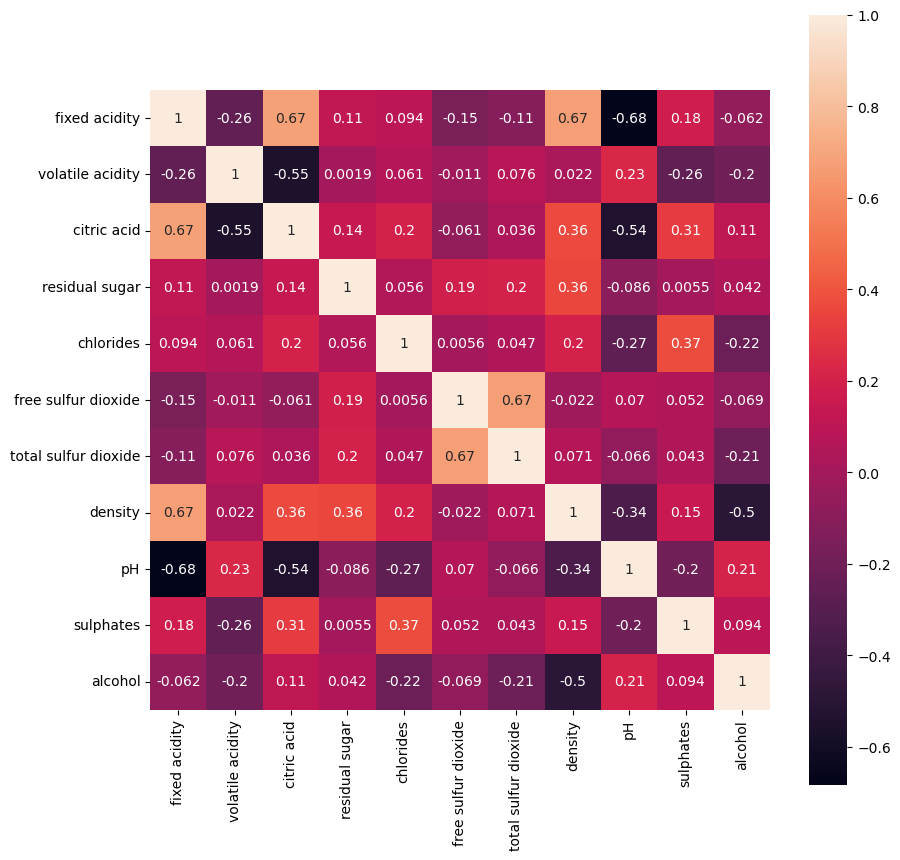

In [7]:
#Examaning a corelation matrix of all the features 
plt.figure(figsize=(10,10))
# cmap=sns.diverging_palette(275,150,  s=40, l=65, n=9)
corr = dataset.corr()
# plt.subplots(figsize=(18,18))
sns.heatmap(corr,annot=True, square=True);

<AxesSubplot:xlabel='quality', ylabel='count'>

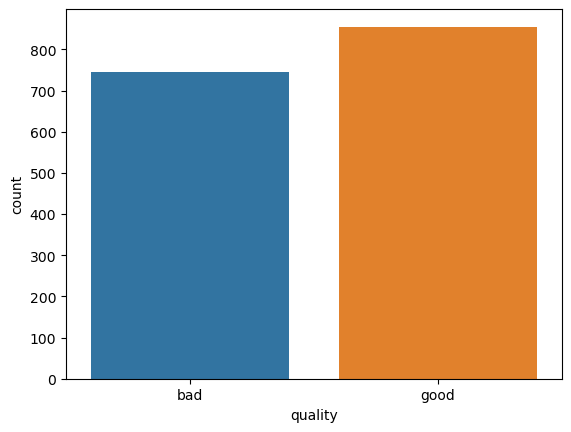

In [8]:
sns.countplot(x=dataset["quality"])

C:\Users\pc\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\pc\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


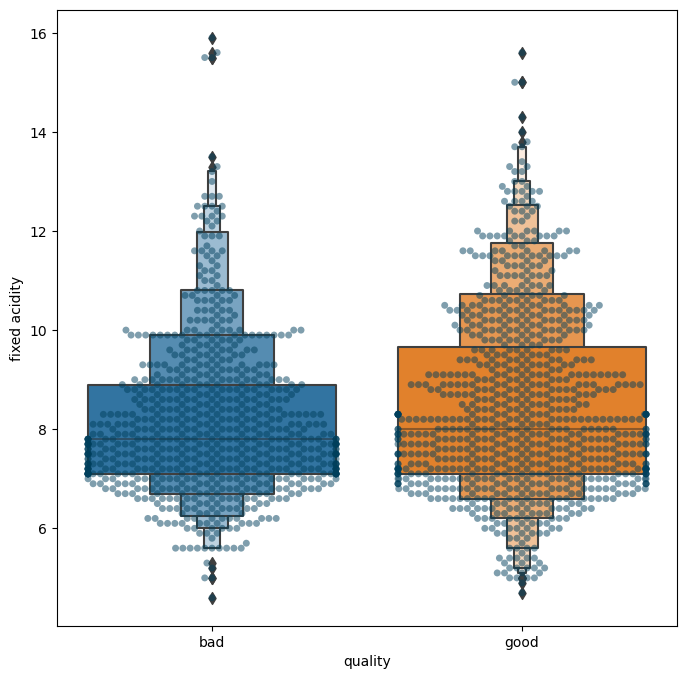

C:\Users\pc\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\pc\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


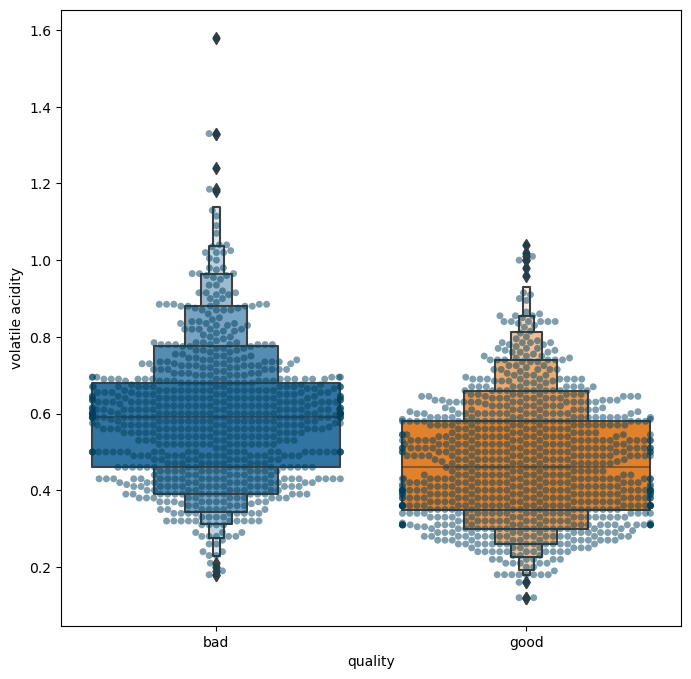

C:\Users\pc\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\pc\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


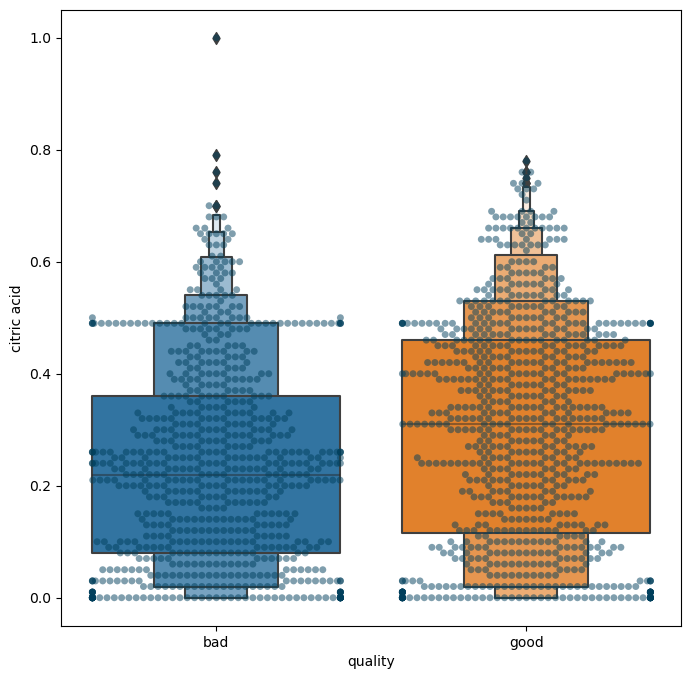

C:\Users\pc\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 46.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\pc\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 52.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


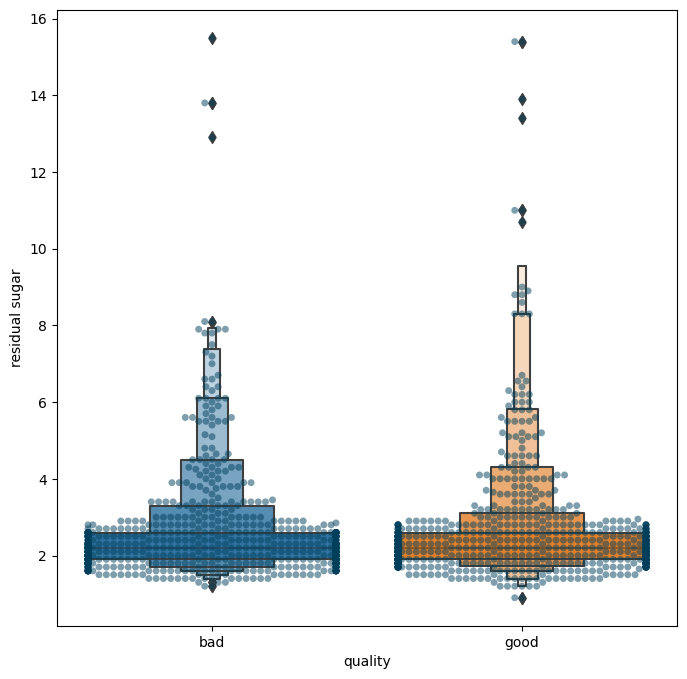

C:\Users\pc\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 50.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\pc\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 55.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


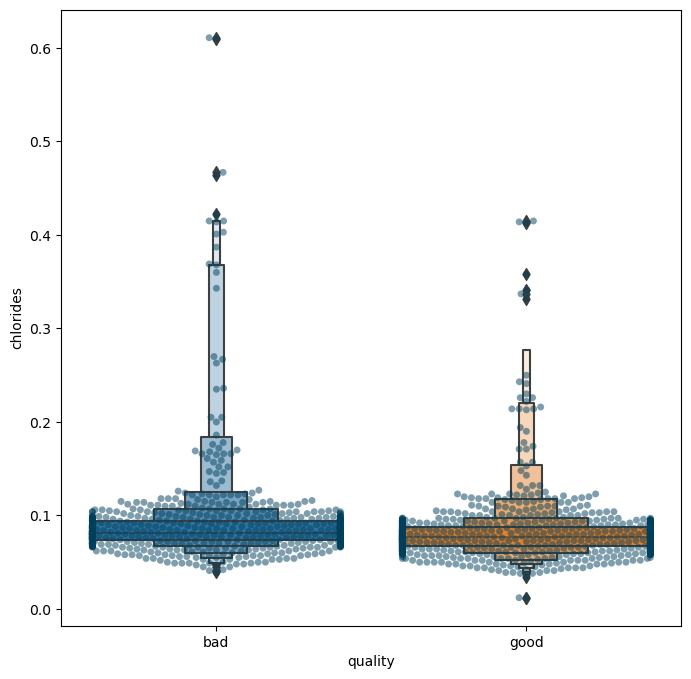

C:\Users\pc\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\pc\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 10.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


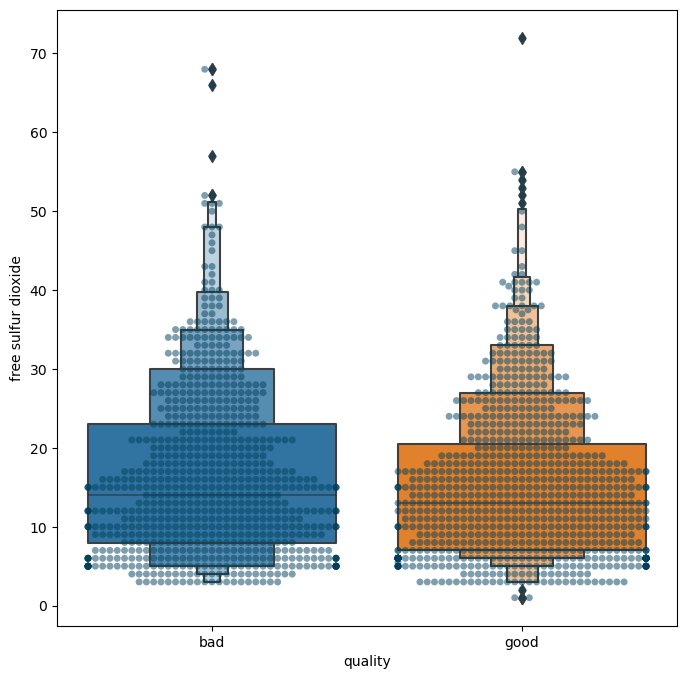

C:\Users\pc\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\pc\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 31.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


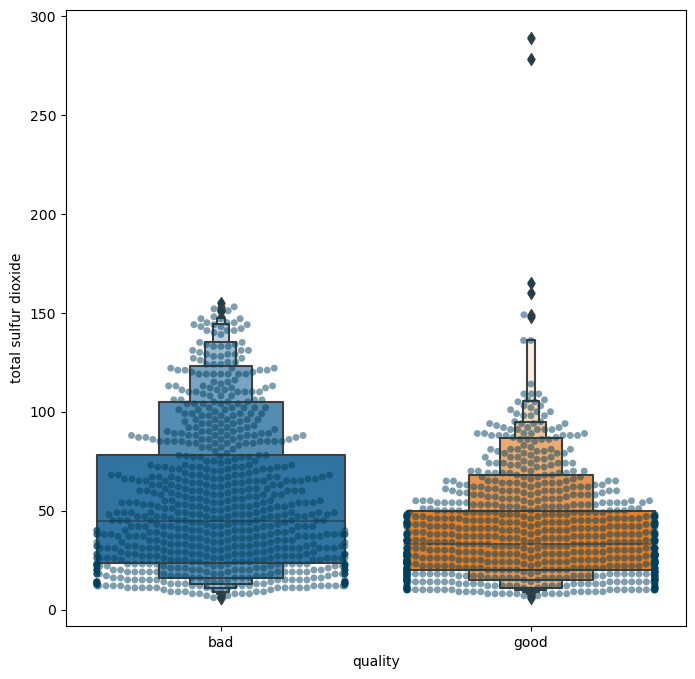

C:\Users\pc\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


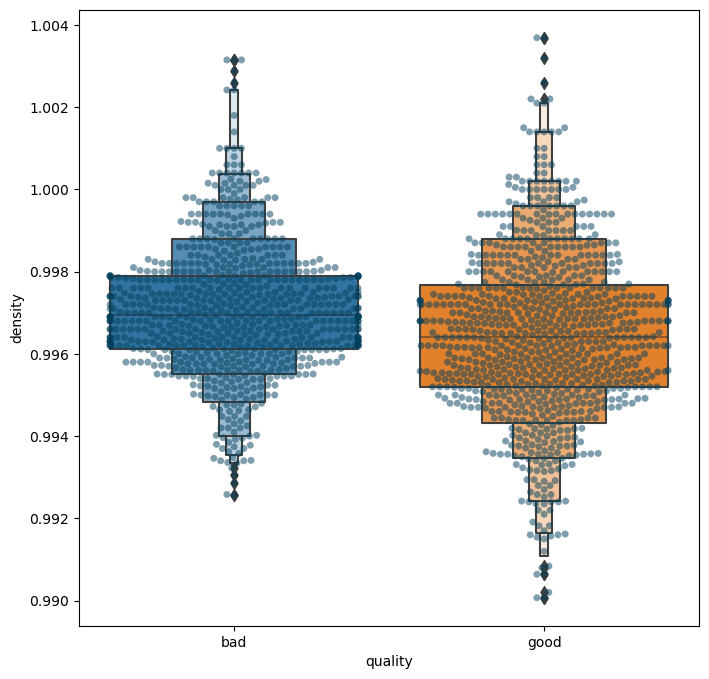

C:\Users\pc\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\pc\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 12.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


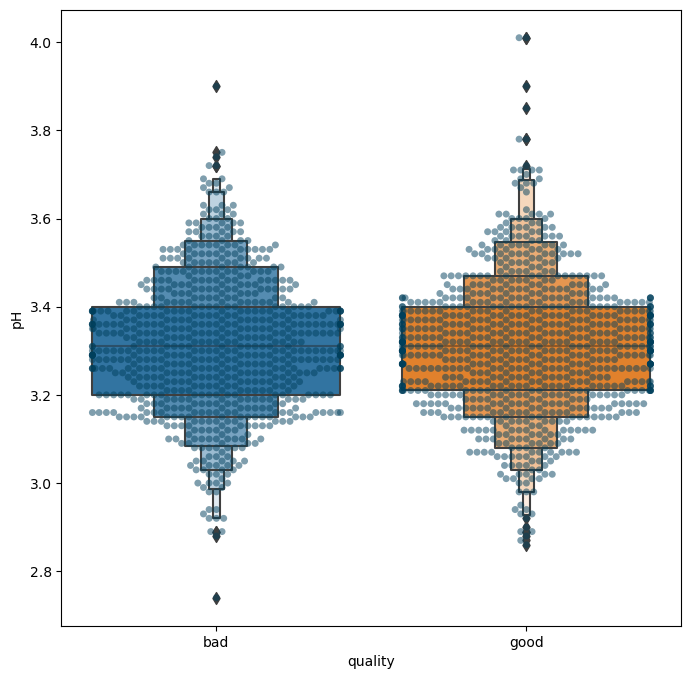

C:\Users\pc\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 26.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\pc\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 21.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


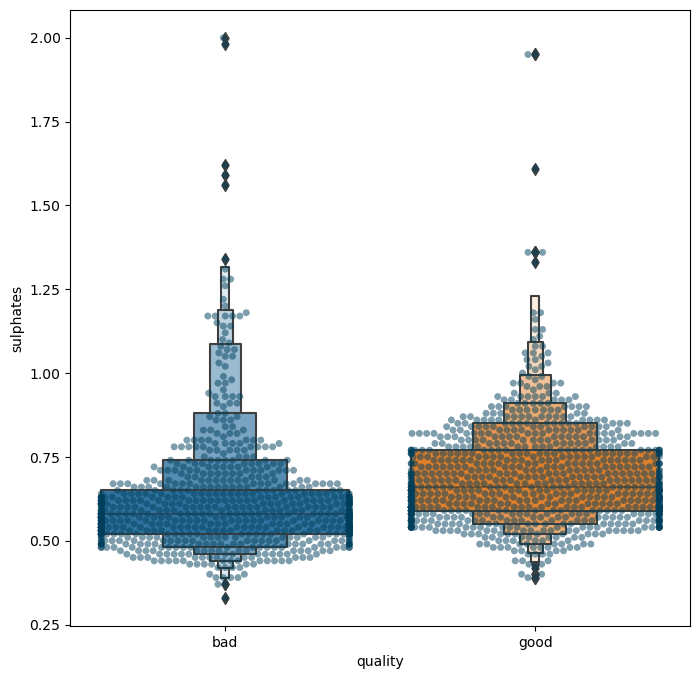

C:\Users\pc\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 22.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


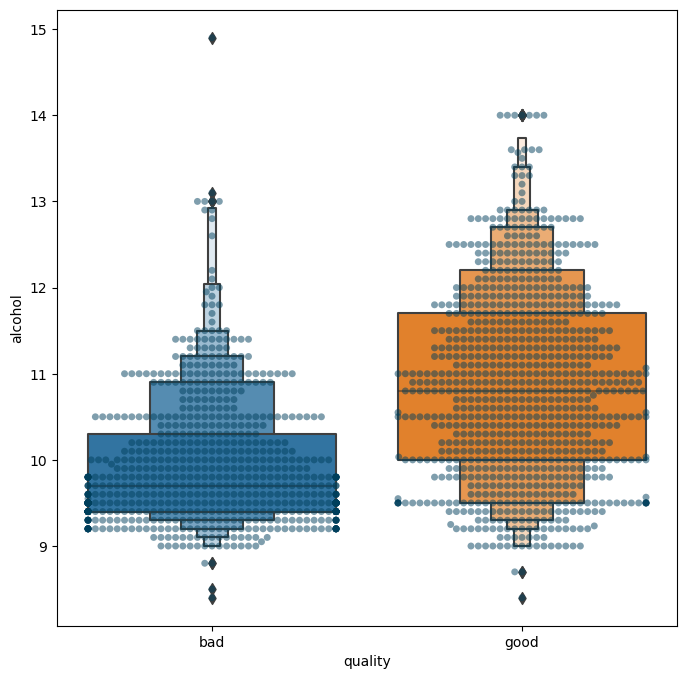

In [9]:
# Boxen and swarm plot of some non binary features.
feature = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"]
for i in feature:
    plt.figure(figsize=(8,8))
    sns.swarmplot(x=dataset["quality"], y=dataset[i], color="#003f5c", alpha=0.5)
    sns.boxenplot(x=dataset["quality"], y=dataset[i])
    plt.show()

In [10]:
from sklearn.preprocessing import LabelEncoder
L1=LabelEncoder()
dataset["quality"]=L1.fit_transform(dataset["quality"])
dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [11]:
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values
y

array([0, 0, 0, ..., 1, 0, 1])

In [12]:
from sklearn.preprocessing import StandardScaler #MinMaxScaler
m1=StandardScaler()
X=m1.fit_transform(x)

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)

In [14]:
from keras import callbacks
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True)

### Adam Optimizer

In [21]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=25, activation='LeakyReLU'))
ann.add(tf.keras.layers.Dense(units=18, activation='relu'))
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann.fit(x_train, y_train, batch_size = 32, epochs = 100)
# ANN = ann.fit(x_train, y_train, batch_size = 32, epochs = 100,callbacks=[early_stopping], validation_split=0.2)

Epoch 1/100
40/40 [==============================] - 2s 6ms/step - loss: 1.1837 - accuracy: 0.5848
Epoch 2/100
40/40 [==============================] - 0s 5ms/step - loss: 0.6730 - accuracy: 0.5950
Epoch 3/100
40/40 [==============================] - 0s 5ms/step - loss: 0.6490 - accuracy: 0.6247
Epoch 4/100
40/40 [==============================] - 0s 5ms/step - loss: 0.6572 - accuracy: 0.6114
Epoch 5/100
40/40 [==============================] - 0s 5ms/step - loss: 0.6445 - accuracy: 0.6145
Epoch 6/100
40/40 [==============================] - 0s 5ms/step - loss: 0.6350 - accuracy: 0.6294
Epoch 7/100
40/40 [==============================] - 0s 6ms/step - loss: 0.6341 - accuracy: 0.6294
Epoch 8/100
40/40 [==============================] - 0s 6ms/step - loss: 0.6472 - accuracy: 0.6216
Epoch 9/100
40/40 [==============================] - 0s 6ms/step - loss: 0.6361 - accuracy: 0.6364
Epoch 10/100
40/40 [==============================] - 0s 7ms/step - loss: 0.6351 - accuracy: 0.6396
Epoch 11/

Epoch 83/100
40/40 [==============================] - 0s 8ms/step - loss: 0.5213 - accuracy: 0.7357
Epoch 84/100
40/40 [==============================] - 0s 6ms/step - loss: 0.5124 - accuracy: 0.7482
Epoch 85/100
40/40 [==============================] - 0s 5ms/step - loss: 0.5157 - accuracy: 0.7514
Epoch 86/100
40/40 [==============================] - 0s 5ms/step - loss: 0.5113 - accuracy: 0.7475
Epoch 87/100
40/40 [==============================] - 0s 6ms/step - loss: 0.5061 - accuracy: 0.7592
Epoch 88/100
40/40 [==============================] - 0s 6ms/step - loss: 0.5058 - accuracy: 0.7514
Epoch 89/100
40/40 [==============================] - 0s 6ms/step - loss: 0.5086 - accuracy: 0.7623
Epoch 90/100
40/40 [==============================] - 0s 7ms/step - loss: 0.5128 - accuracy: 0.7475
Epoch 91/100
40/40 [==============================] - 0s 7ms/step - loss: 0.5121 - accuracy: 0.7482
Epoch 92/100
40/40 [==============================] - 0s 7ms/step - loss: 0.5165 - accuracy: 0.7451


In [27]:
y_ann=ann.predict(x_test)
y_pred=np.where(y_ann>0.5,1,0)

10/10 [==============================] - 0s 10ms/step


In [28]:
y_pred

array([[1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
    

In [29]:
from sklearn.metrics import accuracy_score
a=accuracy_score(y_test,y_pred)*100
print("test accuracy",a)

test accuracy 73.4375


<AxesSubplot:>

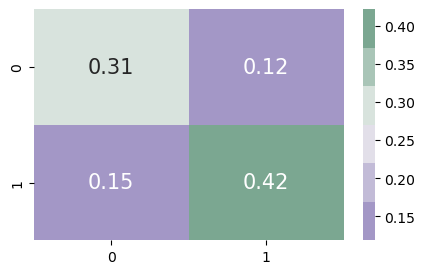

In [35]:
# confusion matrix
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
cmap1 = sns.diverging_palette(275,150,  s=40, l=65, n=6)
plt.subplots(figsize=(5,3))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.72      0.70       138
           1       0.78      0.74      0.76       182

    accuracy                           0.73       320
   macro avg       0.73      0.73      0.73       320
weighted avg       0.74      0.73      0.74       320

